In [1]:
import sys
import os
import sympy as sp
import numpy as np

# Add the correct path to the P2 folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from geraden_fit import geraden_fit
from tabelle import tabellen_ersteller
from scientific_error_rounder import runden_und_speichern
from mean_calc_w_err import err_weighted_mean
from data_handler import add_column_to_file


***Teil a (Jannis' Werk - sehr verlässlich)***

In [ ]:
var_names=[T, U1, U2, U3, U4, T0]=sp.symbols('T U1 U2 U3 U4 T0')
formula_list=[
    (T**4- T0**4)*10**(-8),
    U1/3,
    U2/3,
    U3/3,
    U4/3,
    ]
evaluate_gaussian_error('b_daten_korrigiert.txt',formulas=formula_list, variables=var_names, result_length=2,result_names=['T^4-T0^4 [10^8*K^4]', 'Phi/A_sp[W/m^2]', 'Phi/A_ma[W/m^2]', 'Phi/A_we[W/m^2]', 'Phi/A_sw[W/m^2]'])

sqrt((4.0e-8*T**3*del_T)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (-4.0e-8*T0**3*del_T0)**2)
sqrt((0)**2 + (del_U1/3)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (del_U2/3)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_U3/3)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_U4/3)**2 + (0)**2)
Zeile 1: [1.05, 0.74, 0.0, 0.03, 0.0, 0.03, 1.0, 0.03, 0.97, 0.03]
Zeile 2: [6.48, 0.76, 0.17, 0.03, 0.4, 0.03, 2.63, 0.03, 2.53, 0.03]
Zeile 3: [12.18, 0.78, 0.27, 0.03, 0.7, 0.03, 4.33, 0.03, 4.2, 0.03]
Zeile 4: [18.17, 0.81, 0.5, 0.03, 1.03, 0.03, 6.07, 0.03, 6.03, 0.03]
Zeile 5: [31.04, 0.85, 0.9, 0.03, 1.87, 0.03, 9.67, 0.03, 9.57, 0.03]
Zeile 6: [37.93, 0.88, 1.33, 0.03, 2.33, 0.03, 12.23, 0.03, 12.03, 0.03]
Zeile 7: [45.16, 0.91, 1.73, 0.03, 2.73, 0.03, 14.3, 0.03, 13.93, 0.03]
Zeile 8: [60.6, 0.96, 2.17, 0.03, 3.83, 0.03, 18.63, 0.03, 18.7, 0.03]
Zeile 9: [77.47, 1.02, 2.8, 0.03, 4.8, 0.03, 23.23, 0.03, 23.2, 0.03]
Zeile 10: [95.82

0.03931867121100647 0.03892612314781365
Fit-Ergebnisse für Spiegelnd:
Schwerpunkt: (34.5 ± 0.9, 1.20 ± 0.03)
Steigung: 0.0391 ± 0.0005
Y-Achsenabschnitt: -0.149 ± 0.022

0.06320544661182308 0.06311544467003352
Fit-Ergebnisse für Matt:
Schwerpunkt: (33.2 ± 0.9, 2.03 ± 0.03)
Steigung: 0.0631 ± 0.0007
Y-Achsenabschnitt: -0.07 ± 0.03

0.2915491890845779 0.2924356695632672
Fit-Ergebnisse für Weiß:
Schwerpunkt: (31.8 ± 0.9, 10.09 ± 0.03)
Steigung: 0.292 ± 0.003
Y-Achsenabschnitt: 0.79 ± 0.12

0.2917390344554283 0.29234170796563447
Fit-Ergebnisse für Schwarz:
Schwerpunkt: (31.8 ± 0.9, 9.99 ± 0.03)
Steigung: 0.292 ± 0.003
Y-Achsenabschnitt: 0.69 ± 0.12



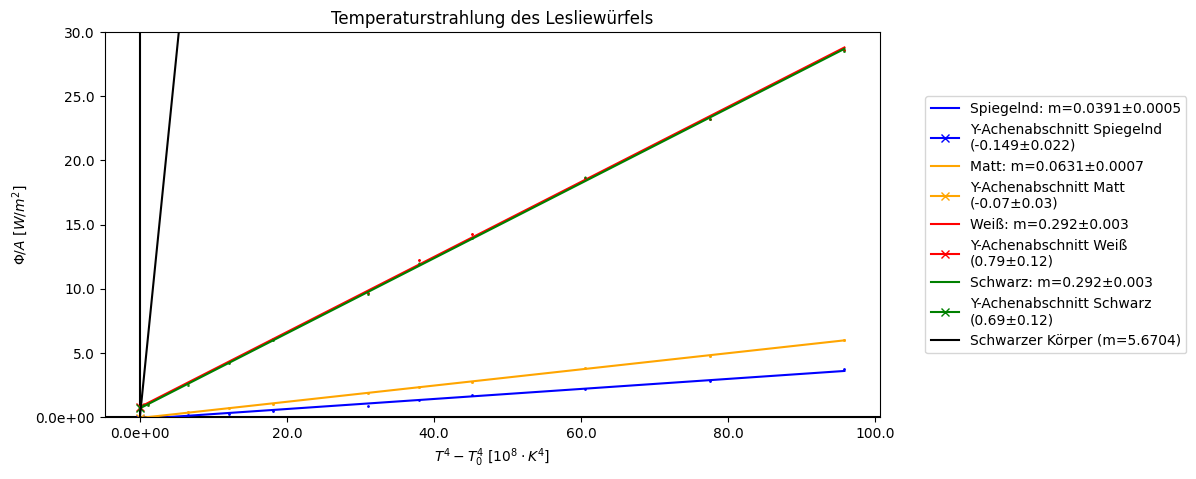

In [13]:
geraden_fit('b_daten_korrigiert_results.csv', title = 'Temperaturstrahlung des Lesliewürfels',
             x_label = r'$T^4-T_0^4 ~ [10^8 \cdot K^4]$', y_label = r'$\Phi/A ~ [W/m^2]$', 
                save = True, y_colors = ['blue', 'orange', 'red', 'green'],
                focus_point = False, y_labels = ['Spiegelnd', 'Matt', 'Weiß', 'Schwarz'], plot_x_inter = False, plot_errors=False, plot_y_inter=True,
                Ursprungsgerade = 5.6704, y_max = 30, y_min = 0, legendlocation = 'outside right', Ursprungsgerade_title = 'Schwarzer Körper'
            )

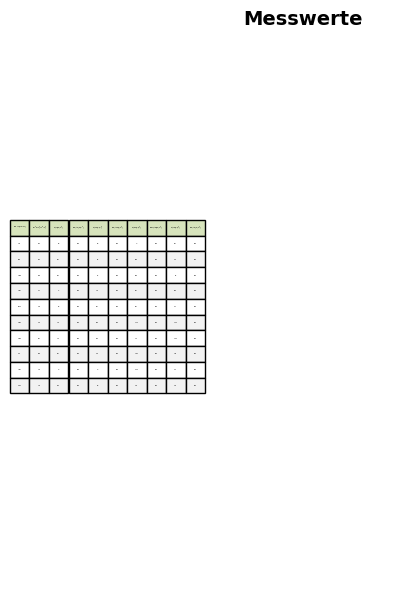

,$T^4-T0^4[10^8*K^4]$,$err_T^4-T0^4[10^8*K^4]$,$\Phi/A_sp[W/m^2]$,$err_\Phi/A_sp[W/m^2]$,$\Phi/A_ma[W/m^2]$,$err_\Phi/A_ma[W/m^2]$,$\Phi/A_we[W/m^2]$,$err_Phi/A_we[W/m^2]$,$\Phi/A_sw[W/m^2]$,$err_\Phi/A_sw[W/m^2]$
0,1.05,0.74,0.00,0.03,0.00,0.03,1.00,0.03,0.97,0.03
1,6.48,0.76,0.17,0.03,0.40,0.03,2.63,0.03,2.53,0.03
2,12.18,0.78,0.27,0.03,0.70,0.03,4.33,0.03,4.20,0.03
3,18.17,0.81,0.50,0.03,1.03,0.03,6.07,0.03,6.03,0.03
4,31.04,0.85,0.90,0.03,1.87,0.03,9.67,0.03,9.57,0.03
5,37.93,0.88,1.33,0.03,2.33,0.03,12.23,0.03,12.03,0.03
6,45.16,0.91,1.73,0.03,2.73,0.03,14.30,0.03,13.93,0.03
7,60.60,0.96,2.17,0.03,3.83,0.03,18.63,0.03,18.70,0.03
8,77.47,1.02,2.80,0.03,4.80,0.03,23.23,0.03,23.20,0.03
9,95.82,1.09,3.73,0.03,6.00,0.03,28.60,0.03,28.50,0.03


In [2]:
tabellen_ersteller('b_daten_korrigiert_results.csv')

***Ab hier beginnt Teil c (von Dejan erstellt, nicht trauen!)***  
  
*Aufgabenteil 1:*

In [12]:
runden_und_speichern('c1_daten')
runden_und_speichern('c2_daten')

Die gerundeten Daten wurden in der Datei "c1_daten_rounded" gespeichert.
Die gerundeten Daten wurden in der Datei "c2_daten_rounded" gespeichert.


In [31]:
S=30e-6
var_names=[d, U]=sp.symbols('d U')
formula_list=[
	1/d**3,
    U/(100*S),
    ]
evaluate_gaussian_error('c1_daten_rounded.txt',formulas=formula_list, variables=var_names, result_length=5,
result_names=['d**3 [cm**3]', 'Phi/A [W]'], output_file_suffix='leistung_var')

sqrt((-3*del_d/d**4)**2 + (0)**2)
sqrt((0)**2 + (333.333333333333*del_U)**2)
Zeile 1: [0.00024, 5e-05, 545.0, 0.33333]
Zeile 2: [0.00013, 2e-05, 323.66667, 0.33333]
Zeile 3: [6e-05, 1e-05, 175.33333, 0.33333]
Zeile 4: [4e-05, 0.0, 98.33333, 0.33333]
Zeile 5: [2e-05, 0.0, 60.66667, 0.33333]
Zeile 6: [2e-05, 0.0, 40.66667, 0.33333]
Zeile 7: [1e-05, 0.0, 22.0, 0.33333]
Auswertung abgeschlossen. Ergebnisse wurden in 'c1_daten_rounded_leistung_var.csv' gespeichert.


Fit-Ergebnisse für Ausgleichsgerade:
Schwerpunkt: (0.000074 ± 0.000008, 0 ± 30000)
Steigung: 0 ± 160000000
Y-Achsenabschnitt: 0 ± 17000



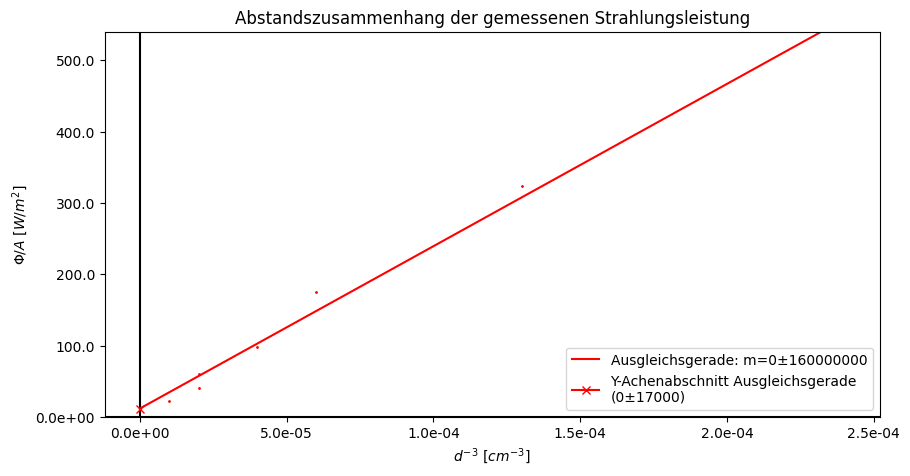

In [48]:
geraden_fit('c1_daten_rounded_leistung_var.csv', title = 'Abstandszusammenhang der gemessenen Strahlungsleistung',
             x_label = r'$d^{-3} ~ [cm^{-3}]$', y_label = r'$\Phi/A ~ [W/m^2]$', 
                save = True, y_colors = ['red'],
                focus_point = False, y_labels = ['Ausgleichsgerade'], plot_x_inter = False, plot_errors=False, plot_y_inter=True,
                y_max = 540, y_min = 0, legendlocation = 'lower right'
            )

*Aufgabeteil 2:*

In [53]:
alpha, beta =4.28e-3, 6.67e-7

var_names=[U_Nt, I_Nt, U_MM, T, R_0]=sp.symbols('U_Nt I_Nt U_MM T R_0')
formula_list=[
	T,
	R_0,
	U_Nt/I_Nt,
    U_MM/(100*S)
    ]
evaluate_gaussian_error('c2_daten_rounded.txt',formulas=formula_list, variables=var_names, result_length=5,
result_names=['T_0[K]', 'R_0[Ohm]', 'R[Ohm]','Phi/A [W]'], output_file_suffix='zwischen')

sqrt((0)**2 + (0)**2 + (0)**2 + (del_T)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_R_0)**2)
sqrt((del_U_Nt/I_Nt)**2 + (-U_Nt*del_I_Nt/I_Nt**2)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (333.333333333333*del_U_MM)**2 + (0)**2 + (0)**2)
Zeile 1: [297.2, 2.0, 0.55, 0.05, 2.85714, 0.02363, 535.33333, 1.66667]
Zeile 2: [297.2, 2.0, 0.55, 0.05, 2.75, 0.02412, 473.0, 1.66667]
Zeile 3: [297.2, 2.0, 0.55, 0.05, 2.58667, 0.02462, 390.0, 1.66667]
Zeile 4: [297.2, 2.0, 0.55, 0.05, 2.48571, 0.02565, 341.33333, 1.66667]
Zeile 5: [297.2, 2.0, 0.55, 0.05, 2.2, 0.0276, 226.66667, 1.66667]
Zeile 6: [297.2, 2.0, 0.55, 0.05, 1.92, 0.03051, 144.33333, 1.66667]
Zeile 7: [297.2, 2.0, 0.55, 0.05, 1.65, 0.03518, 78.0, 1.66667]
Zeile 8: [297.2, 2.0, 0.55, 0.05, 1.26667, 0.04187, 33.66667, 1.66667]
Zeile 9: [297.2, 2.0, 0.55, 0.05, 0.7, 0.05423, 14.33333, 1.66667]
Auswertung abgeschlossen. Ergebnisse wurden in 'c2_daten_rounded_zwischen.csv' gespeichert.


In [70]:
var_names=[T_0, R_0, R, P]=sp.symbols('T_0 R_0 R P')
formula_list=[
	T_0-alpha/(2*beta)+sp.sqrt(alpha**2/(4*beta**2)+R/(R_0*beta)-1/beta),
	P
    ]
evaluate_gaussian_error('c2_daten_rounded_zwischen.csv',formulas=formula_list, variables=var_names, result_length=5,
result_names=['T[K]','Phi/A [W]'], output_file_suffix='T')

sqrt((del_T_0)**2 + (-252.776839228478*R*del_R_0/(R_0**2*sqrt(0.170474876041507*R/R_0 + 1)))**2 + (252.776839228478*del_R/(R_0*sqrt(0.170474876041507*R/R_0 + 1)))**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_P)**2)
Zeile 1: [1161.00988, 87.31611, 535.33333, 1.66667]
Zeile 2: [1124.99115, 84.83653, 473.0, 1.66667]
Zeile 3: [1069.45518, 80.97959, 390.0, 1.66667]
Zeile 4: [1034.73557, 78.5797, 341.33333, 1.66667]
Zeile 5: [934.78323, 71.57653, 226.66667, 1.66667]
Zeile 6: [834.24142, 64.51069, 144.33333, 1.66667]
Zeile 7: [734.66546, 57.63174, 78.0, 1.66667]
Zeile 8: [588.43009, 47.7612, 33.66667, 1.66667]
Zeile 9: [360.30081, 34.89018, 14.33333, 1.66667]
Auswertung abgeschlossen. Ergebnisse wurden in 'c2_daten_rounded_zwischen_T.csv' gespeichert.


In [72]:
var_names=[T, P]=sp.symbols('T P')
formula_list=[
	sp.log(T,10),
	sp.log(P,10)
    ]
evaluate_gaussian_error('c2_daten_rounded_zwischen_T.csv',formulas=formula_list, variables=var_names, result_length=5,
result_names=['logT[K]','log(Phi/A) [W]'], output_file_suffix='plot')

sqrt((del_T/(T*log(10)))**2 + (0)**2)
sqrt((0)**2 + (del_P/(P*log(10)))**2)
Zeile 1: [3.06484, 0.03266, 2.72862, 0.00135]
Zeile 2: [3.05115, 0.03275, 2.67486, 0.00153]
Zeile 3: [3.02916, 0.03288, 2.59106, 0.00186]
Zeile 4: [3.01483, 0.03298, 2.53318, 0.00212]
Zeile 5: [2.97071, 0.03325, 2.35539, 0.00319]
Zeile 6: [2.92129, 0.03358, 2.15937, 0.00501]
Zeile 7: [2.86609, 0.03407, 1.89209, 0.00928]
Zeile 8: [2.76969, 0.03525, 1.5272, 0.0215]
Zeile 9: [2.55667, 0.04206, 1.15635, 0.0505]
Auswertung abgeschlossen. Ergebnisse wurden in 'c2_daten_rounded_zwischen_T_plot.csv' gespeichert.


Fit-Ergebnisse für Ausgleichsgerade:
Schwerpunkt: (3.037 ± 0.012, 2.6198 ± 0.0023)
Steigung: 3.970 ± 0.021
Y-Achsenabschnitt: -9.44 ± 0.06



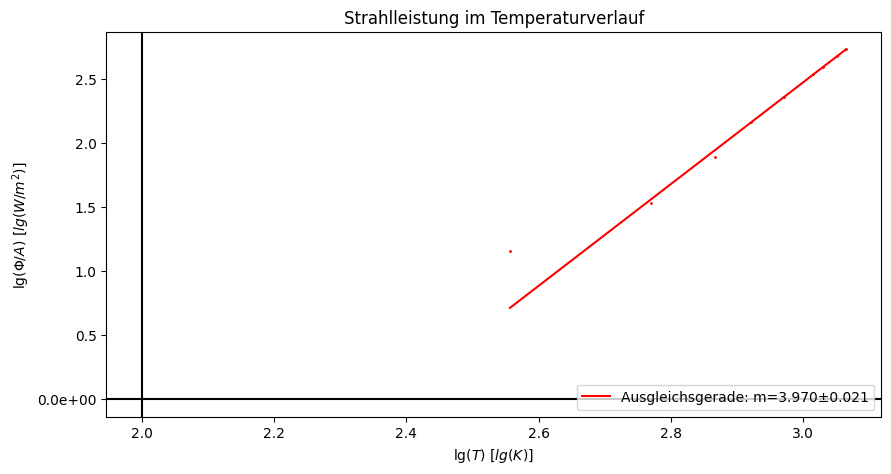

In [93]:
geraden_fit('c2_daten_rounded_zwischen_T_plot.csv', title = 'Strahlleistung im Temperaturverlauf',
             x_label = r'$\lg(T) ~ [lg(K)]$', y_label = r'$\lg(\Phi/A) ~ [lg(W/m^2)]$', 
                save = False, y_colors = ['red'],
                focus_point = False, y_labels = ['Ausgleichsgerade'], plot_x_inter = False, plot_errors=False,
				x_axis=2, legendlocation = 'lower right'
            )